In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
brkln_df = pd.read_csv('extra data sets/rollingsales_brooklyn.csv')
brkln_df = brkln_df.rename(columns={"SALE\nPRICE":"SALE PRICE"})

brkln_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1103,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,"$403,572",7/9/2013
1,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1105,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,"$218,010",7/12/2013
2,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1401,,,290 GREENE AVE,,...,0,0,0,0,0,0,2,R1,"$952,311",4/25/2013
3,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1402,,,290 GREENE AVE,,...,0,0,0,0,0,0,2,R1,"$842,692",4/25/2013
4,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,1967,1403,,,290 GREENE AVE,,...,0,0,0,0,0,0,2,R1,"$815,288",4/25/2013


In [3]:
brkln_df['SALE PRICE'] = brkln_df['SALE PRICE'].str.replace('$','').str.replace(',',"")
brkln_df['SALE PRICE'] = brkln_df['SALE PRICE'].astype('int64')
brkln_df['LAND SQUARE FEET'] = brkln_df['LAND SQUARE FEET'].str.replace(',','')
brkln_df['LAND SQUARE FEET'] = brkln_df['LAND SQUARE FEET'].astype('int64')
brkln_df['GROSS SQUARE FEET'] = brkln_df['GROSS SQUARE FEET'].str.replace(',','')
brkln_df['GROSS SQUARE FEET'] = brkln_df['GROSS SQUARE FEET'].astype('int64')


Text(0, 0.5, '# Properties')

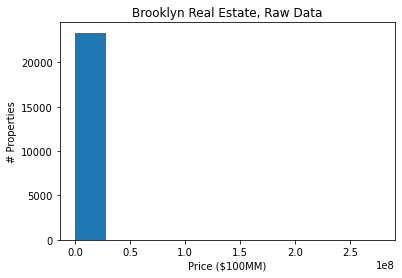

In [4]:
hist = plt.hist(brkln_df['SALE PRICE'])

plt.title('Brooklyn Real Estate, Raw Data')
plt.xlabel('Price ($100MM)')
plt.ylabel('# Properties')

Text(0.5, 0, 'Price ($100MM)')

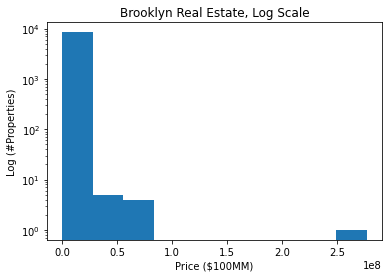

In [9]:
brkln_df = brkln_df.loc[~(brkln_df['SALE PRICE'] == 0)]

log_hist = plt.hist(brkln_df['SALE PRICE'], log = True)
plt.title('Brooklyn Real Estate, Log Scale')
plt.ylabel('Log (#Properties)')
plt.xlabel('Price ($100MM)')

Text(0, 0.5, 'PRICE ($100MM)')

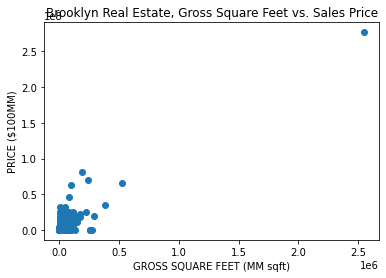

In [6]:
brkln_df = brkln_df.loc[~(brkln_df['GROSS SQUARE FEET'] == 0)]


scatter = plt.scatter(brkln_df['GROSS SQUARE FEET'], brkln_df['SALE PRICE'])
plt.title('Brooklyn Real Estate, Gross Square Feet vs. Sales Price')
plt.xlabel('GROSS SQUARE FEET (MM sqft)')
plt.ylabel('PRICE ($100MM)')

Text(0, 0.5, 'PRICE ($10MM)')

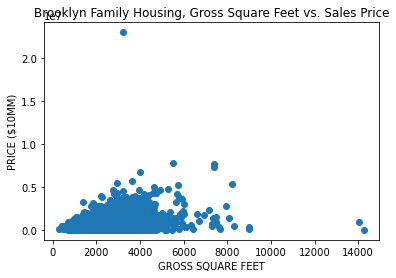

In [7]:
family_homes = brkln_df.loc[(brkln_df['BUILDING CLASS CATEGORY'].str.contains(pat = 'Family', case = False))]

family_scatter = plt.scatter(family_homes['GROSS SQUARE FEET'], family_homes['SALE PRICE'])

plt.title('Brooklyn Family Housing, Gross Square Feet vs. Sales Price')
plt.xlabel('GROSS SQUARE FEET')
plt.ylabel('PRICE ($10MM)')

In [8]:
family_homes.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,6610.0,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.000000,6610.0,6.610000e+03
mean,3.0,4630.156278,55.731014,11220.738729,1.907716,0.055976,1.963238,2267.141755,2414.050832,1924.589864,1.0,6.352061e+05
std,0.0,2527.912852,121.496473,11.541932,0.680190,0.232510,0.702121,947.487907,954.121557,54.494248,0.0,6.274984e+05
min,3.0,34.000000,1.000000,11201.000000,0.000000,0.000000,0.000000,340.000000,300.000000,0.000000,1.0,1.000000e+00
25%,3.0,1837.000000,20.000000,11210.000000,1.000000,0.000000,1.000000,1800.000000,1732.500000,1905.000000,1.0,3.300000e+05
50%,3.0,4956.000000,38.000000,11221.000000,2.000000,0.000000,2.000000,2000.000000,2268.000000,1920.000000,1.0,5.277500e+05
75%,3.0,6725.750000,60.000000,11230.000000,2.000000,0.000000,2.000000,2500.000000,3000.000000,1930.000000,1.0,7.700000e+05
max,3.0,8955.000000,2756.000000,11416.000000,4.000000,2.000000,5.000000,20000.000000,14260.000000,2012.000000,1.0,2.300000e+07
